In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
# Importing Dataset
raw_data = pd.read_csv('bank-full.csv', delimiter=';')
raw_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
#Data Exploration
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:

raw_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
#Missing Values
raw_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
#Duplicated Values
#print the duplicated rows
raw_data[raw_data.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [7]:
# shape of the data
raw_data.shape

(45211, 17)

In [8]:
# check correlation between variables

corel = raw_data.corr().round(2)
corel

C:\Users\astik\AppData\Local\Temp\ipykernel_4084\2845012004.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corel = raw_data.corr().round(2)


,age,balance,day,duration,campaign,pdays,previous
age,1.00,0.10,-0.01,-0.00,0.00,-0.02,0.00
balance,0.10,1.00,0.00,0.02,-0.01,0.00,0.02
day,-0.01,0.00,1.00,-0.03,0.16,-0.09,-0.05
duration,-0.00,0.02,-0.03,1.00,-0.08,-0.00,0.00
campaign,0.00,-0.01,0.16,-0.08,1.00,-0.09,-0.03
pdays,-0.02,0.00,-0.09,-0.00,-0.09,1.00,0.45
previous,0.00,0.02,-0.05,0.00,-0.03,0.45,1.00


In [9]:
# One-Hot Encoding of categrical variables
data1=pd.get_dummies(raw_data,columns=['job','marital','education','contact','poutcome'],drop_first=True)
data1


,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,no,2143,yes,no,5,may,261,1,-1,...,1,0,0,1,0,0,1,0,0,1
1,44,no,29,yes,no,5,may,151,1,-1,...,0,1,1,0,0,0,1,0,0,1
2,33,no,2,yes,yes,5,may,76,1,-1,...,1,0,1,0,0,0,1,0,0,1
3,47,no,1506,yes,no,5,may,92,1,-1,...,1,0,0,0,1,0,1,0,0,1
4,33,no,1,no,no,5,may,198,1,-1,...,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,nov,977,3,-1,...,1,0,0,1,0,0,0,0,0,1
45207,71,no,1729,no,no,17,nov,456,2,-1,...,0,0,0,0,0,0,0,0,0,1
45208,72,no,5715,no,no,17,nov,1127,5,184,...,1,0,1,0,0,0,0,0,1,0
45209,57,no,668,no,no,17,nov,508,4,-1,...,1,0,1,0,0,1,0,0,0,1


In [10]:
data1.info()
data1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   default              45211 non-null  object
 2   balance              45211 non-null  int64 
 3   housing              45211 non-null  object
 4   loan                 45211 non-null  object
 5   day                  45211 non-null  int64 
 6   month                45211 non-null  object
 7   duration             45211 non-null  int64 
 8   campaign             45211 non-null  int64 
 9   pdays                45211 non-null  int64 
 10  previous             45211 non-null  int64 
 11  y                    45211 non-null  object
 12  job_blue-collar      45211 non-null  uint8 
 13  job_entrepreneur     45211 non-null  uint8 
 14  job_housemaid        45211 non-null  uint8 
 15  job_management       45211 non-null  uint8 
 16  job_

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,no,2143,yes,no,5,may,261,1,-1,...,1,0,0,1,0,0,1,0,0,1
1,44,no,29,yes,no,5,may,151,1,-1,...,0,1,1,0,0,0,1,0,0,1
2,33,no,2,yes,yes,5,may,76,1,-1,...,1,0,1,0,0,0,1,0,0,1
3,47,no,1506,yes,no,5,may,92,1,-1,...,1,0,0,0,1,0,1,0,0,1
4,33,no,1,no,no,5,may,198,1,-1,...,0,1,0,0,1,0,1,0,0,1


In [11]:
# Custom Binary Encoding of Binary o/p variables 
data1['default'] = np.where(data1['default'].str.contains("yes"), 1, 0)
data1['housing'] = np.where(data1['housing'].str.contains("yes"), 1, 0)
data1['loan'] = np.where(data1['loan'].str.contains("yes"), 1, 0)
data1['y'] = np.where(data1['y'].str.contains("yes"), 1, 0)
data1



,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,may,261,1,-1,...,1,0,0,1,0,0,1,0,0,1
1,44,0,29,1,0,5,may,151,1,-1,...,0,1,1,0,0,0,1,0,0,1
2,33,0,2,1,1,5,may,76,1,-1,...,1,0,1,0,0,0,1,0,0,1
3,47,0,1506,1,0,5,may,92,1,-1,...,1,0,0,0,1,0,1,0,0,1
4,33,0,1,0,0,5,may,198,1,-1,...,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,nov,977,3,-1,...,1,0,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,17,nov,456,2,-1,...,0,0,0,0,0,0,0,0,0,1
45208,72,0,5715,0,0,17,nov,1127,5,184,...,1,0,1,0,0,0,0,0,1,0
45209,57,0,668,0,0,17,nov,508,4,-1,...,1,0,1,0,0,1,0,0,0,1


In [12]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   default              45211 non-null  int32 
 2   balance              45211 non-null  int64 
 3   housing              45211 non-null  int32 
 4   loan                 45211 non-null  int32 
 5   day                  45211 non-null  int64 
 6   month                45211 non-null  object
 7   duration             45211 non-null  int64 
 8   campaign             45211 non-null  int64 
 9   pdays                45211 non-null  int64 
 10  previous             45211 non-null  int64 
 11  y                    45211 non-null  int32 
 12  job_blue-collar      45211 non-null  uint8 
 13  job_entrepreneur     45211 non-null  uint8 
 14  job_housemaid        45211 non-null  uint8 
 15  job_management       45211 non-null  uint8 
 16  job_

In [13]:

# Find and Replace Encoding for month categorical varaible
data1['month'].value_counts()


may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [14]:
order={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}
data1=data1.replace(order)

In [15]:
data1.info()
data1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int32
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int32
 4   loan                 45211 non-null  int32
 5   day                  45211 non-null  int64
 6   month                45211 non-null  int64
 7   duration             45211 non-null  int64
 8   campaign             45211 non-null  int64
 9   pdays                45211 non-null  int64
 10  previous             45211 non-null  int64
 11  y                    45211 non-null  int32
 12  job_blue-collar      45211 non-null  uint8
 13  job_entrepreneur     45211 non-null  uint8
 14  job_housemaid        45211 non-null  uint8
 15  job_management       45211 non-null  uint8
 16  job_retired          4

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,5,261,1,-1,...,1,0,0,1,0,0,1,0,0,1
1,44,0,29,1,0,5,5,151,1,-1,...,0,1,1,0,0,0,1,0,0,1
2,33,0,2,1,1,5,5,76,1,-1,...,1,0,1,0,0,0,1,0,0,1
3,47,0,1506,1,0,5,5,92,1,-1,...,1,0,0,0,1,0,1,0,0,1
4,33,0,1,0,0,5,5,198,1,-1,...,0,1,0,0,1,0,1,0,0,1


In [16]:
# separate the target feature from the independent features
X = data1.drop('y',axis=1)
y = data1['y']


In [17]:
# split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1234)

In [18]:
# create a logistic regression model and fit the model on the training data
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

c:\Users\astik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
log_reg.coef_

array([[-2.14548638e-02, -1.02903613e-02,  2.52681386e-05,
        -4.15190721e-01, -1.11579239e-01, -2.69414373e-02,
        -1.39350226e-02,  3.09546045e-03, -4.31143217e-01,
        -5.43197823e-04,  1.82110418e-01, -1.60893612e-01,
        -1.49724485e-02, -2.37551843e-03,  1.74092042e-02,
         9.22061075e-02, -6.13534306e-03, -5.72071729e-02,
         2.16465851e-02, -3.38536327e-02,  6.16674715e-04,
         2.07439913e-03, -1.02109825e-01, -6.37199491e-02,
        -1.63712232e-01,  4.46924370e-02,  6.52355603e-03,
         3.12162317e-02, -2.71488897e-01, -1.14926986e-02,
         1.90068654e-01, -2.62831139e-01]])

In [20]:
log_reg.intercept_

array([-0.1575879])

## Model Prediction on Train & Test Data

In [21]:
# get the prediction of the model on the training and test data
pred_train = log_reg.predict(X_train)
pred_test = log_reg.predict(X_test)

In [22]:
pred_train[:300]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [23]:
pred_test[:300]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [24]:
log_reg.predict_proba(X_test).round(2)

array([[0.91, 0.09],
       [0.91, 0.09],
       [0.91, 0.09],
       ...,
       [0.98, 0.02],
       [0.98, 0.02],
       [0.89, 0.11]])

## Evaluate Model Prediction Performance - Train Data

In [25]:
raw_data['y'].value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: y, dtype: float64

In [26]:
# confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

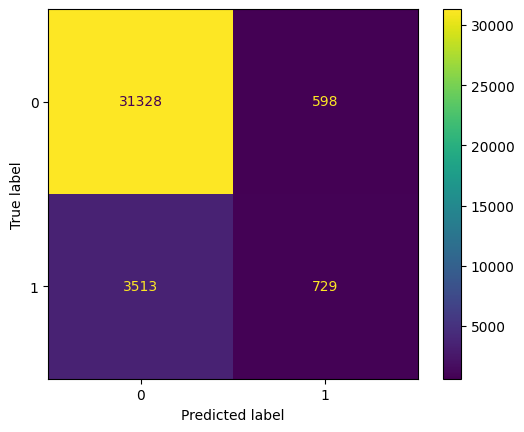

In [27]:
ConfusionMatrixDisplay.from_predictions(y_train, pred_train);

In [28]:
# classification report
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     31926
           1       0.55      0.17      0.26      4242

    accuracy                           0.89     36168
   macro avg       0.72      0.58      0.60     36168
weighted avg       0.86      0.89      0.86     36168



In [29]:
# roc curve with diagonal line and auc score
from sklearn.metrics import RocCurveDisplay

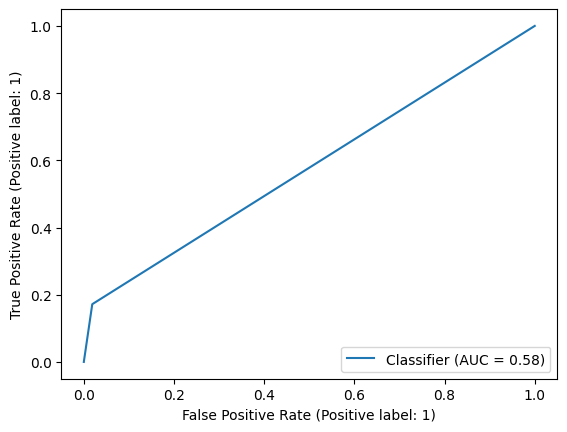

In [30]:
RocCurveDisplay.from_predictions(y_train,pred_train);

## Evaluate Model Prediction Performance - Test Data

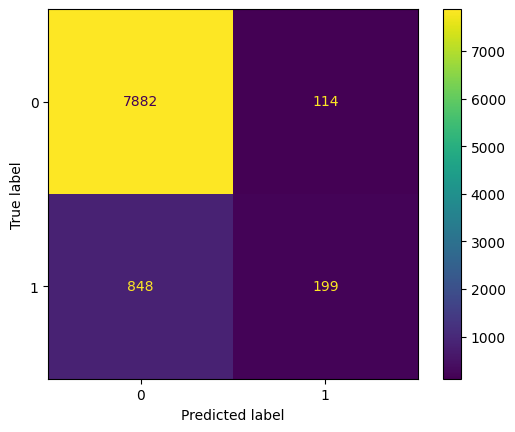

In [31]:
# confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test,pred_test);

In [32]:
# classification report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7996
           1       0.64      0.19      0.29      1047

    accuracy                           0.89      9043
   macro avg       0.77      0.59      0.62      9043
weighted avg       0.87      0.89      0.87      9043



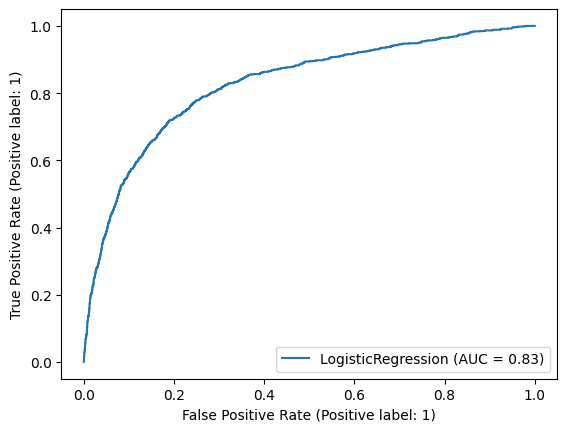

In [33]:
# ROC curve with diagonal line and auc score
RocCurveDisplay.from_estimator(log_reg,X_test,y_test);